# A DEEP LEARNING PREDICTION MODEL FOR LOAN DEFAULT

# The Data
We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club ,  includes 396030 entries and 28 feature variables, with loan_status as the target variable we are predicting.

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:
* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term: The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate: Interest Rate on the loan
* installment: The monthly payment owed by the borrower if the loan originates.
* grade: LC assigned loan grade
* sub_grade: LC assigned loan subgrade
* emp_title: The job title supplied by the Borrower when applying for the loan.
* emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
* annual_inc: The self-reported annual income provided by the borrower during registration.
* verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
* issue_d: The month which the loan was funded
* loan_status: Current status of the loan
* purpose: A category provided by the borrower for the loan request.
* title: The loan title provided by the borrower
* zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.
* addr_state: The state provided by the borrower in the loan application
* dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line: The month the borrower's earliest reported credit line was opened
* open_acc: The number of open credit lines in the borrower's credit file.
* pub_rec: Number of derogatory public records
* revol_bal: Total credit revolving balance
* revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc: The total number of credit lines currently in the borrower's credit file
* initial_list_status: The initial listing status of the loan. Possible values are – W, F
* application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc: Number of mortgage accounts.
* pub_rec_bankruptcies: Number of public record bankruptcies


# Introduction...

Deep learning can be described as a subfield of machine learning that is concerned with training artificial neural networks (NNs) with many layers efficiently. 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

# Our Goal...
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!
The "loan_status" column contains our label.

In [1]:
import numpy as np    # increases efficiency of matrix operations
import pandas as pd   # reads in data files of mixed data types
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# The descriptions for the data features 
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
# we can fetch each feature description with these set of codes
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
# we can fetch each feature description with these set of codes
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
# for instance, we want to know what information is stored in 'mort_acc' ?
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
# we want to import the data and save on data_lc
data_lc = pd.read_csv('lending_club_loan_two.csv')

In [8]:
data_lc.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
# quick info about the features and the data types. We notice several missing data from different features.
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# DATA EXPLORATORY ANALYSIS 
Our aim here is to get a prior understanding of that data for which variables are important, view summary statistics, and perform proper data visualization for better understanding.

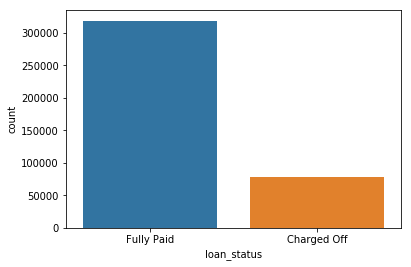

In [10]:
# We want to explore the counts for the loan status, to have a view of the number of entreis in the data set that are fully-paid or charged-off
sns.countplot(x='loan_status',data = data_lc)

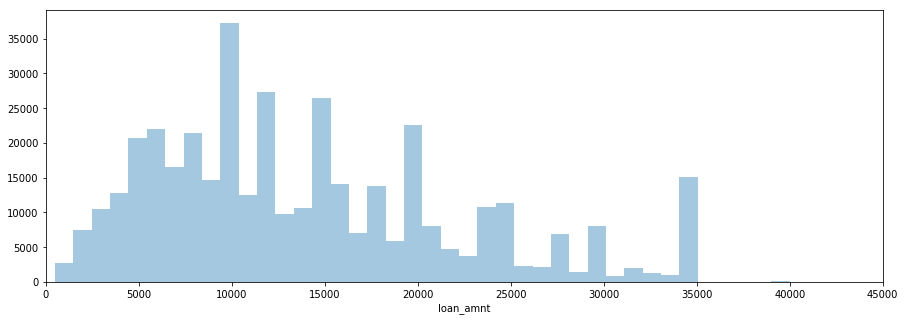

In [11]:
# Create a histogram/distribution plot of the loan_amnt column
plt.figure(figsize=(15,5))
plt.xlim(0,45000)
sns.distplot(data_lc['loan_amnt'],kde=False,bins=40)

In [12]:
#We want to see the relationship between the features by calculating correlation between the continuous feature variables.

data_lc.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


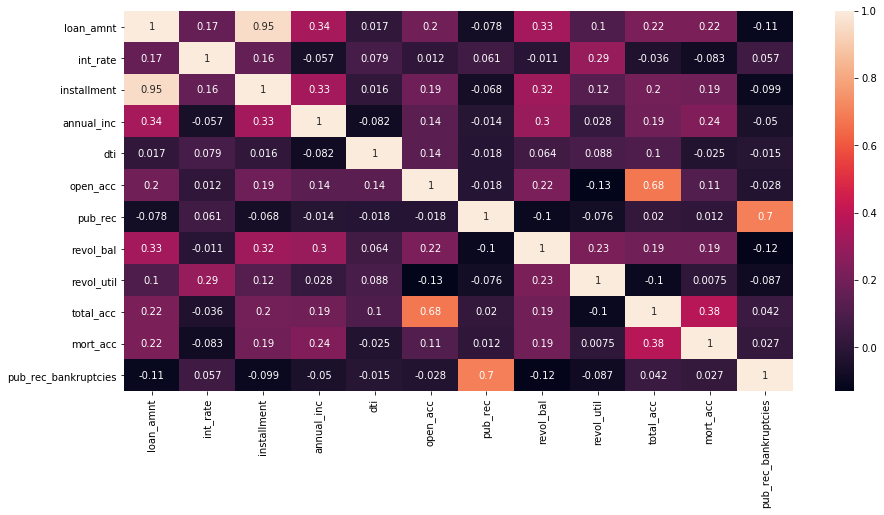

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data_lc.corr(),annot=True)
#plt.ylim(10, 0)

In [14]:
# Going forward there seems a stronger correlation between instalment and loan_amount, we will explore these two features further.
# This correlation make sense when we check the descriptions of these features

print(feat_info('loan_amnt'))

print(feat_info('installment'))

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
None
The monthly payment owed by the borrower if the loan originates.
None


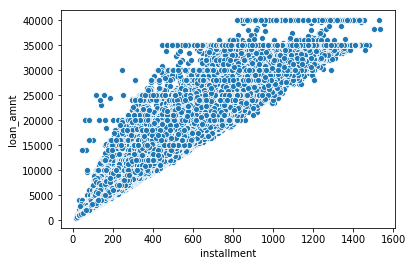

In [15]:
#we can explore further with the scatter plot
sns.scatterplot(x='installment',y='loan_amnt',data=data_lc)

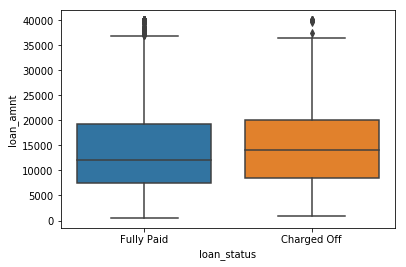

In [16]:
# let's Create a boxplot to explore the relationship between the loan_status and the Loan Amount.
#We see an indication that the average loan amount for charged off customers is higher
sns.boxplot(x='loan_status',y='loan_amnt',data=data_lc)

In [17]:
#We Calculate the summary statistics for the loan amount, grouped by the loan_status to see the boxplot clearly.
data_lc.groupby('loan_status')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
#Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. 
#What will be able to the unique possible grades and subgrades.
sorted(data_lc['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(data_lc['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

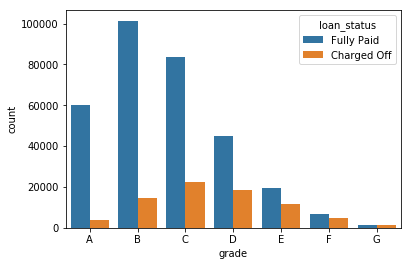

In [20]:
# let's create a countplot per grade. Set the hue to the loan_status label.
grade_order = sorted(data_lc['grade'].unique())
sns.countplot(x='grade',data=data_lc,hue='loan_status', order = grade_order)

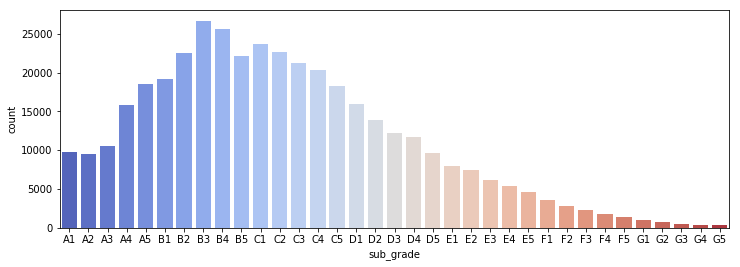

In [21]:
#let's explore the sub_grades 
plt.figure(figsize=(12,4))
subgrade_order = sorted(data_lc['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data_lc,order = subgrade_order,palette='coolwarm')

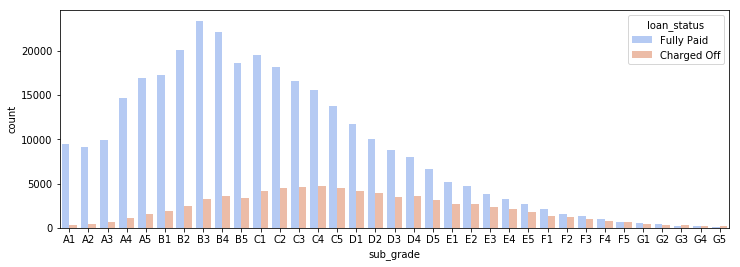

In [22]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data_lc['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data_lc, order = subgrade_order,palette='coolwarm' ,hue='loan_status')

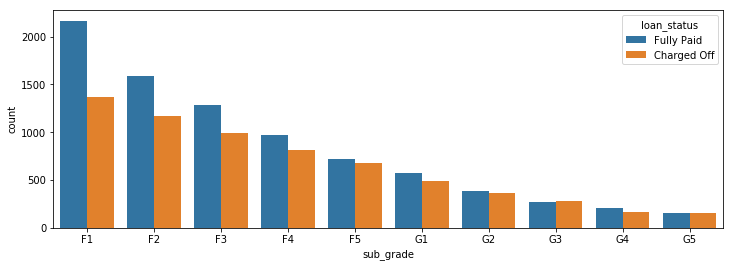

In [23]:
#Above exploration indicates F and G subgrades don't get paid back that often. 
#Let's explore further by Isloating them and recreate the countplot just for those subgrades.

f_and_g = data_lc[(data_lc['grade']=='G') | (data_lc['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data= f_and_g, order = subgrade_order,hue='loan_status')

In [24]:
# We want to create a new column called 'load_repaid' that will replicate loan_status features 
# but status will be converted to dummy variables,"Fully Paid" as 1 and "Charged Off" as 0.

data_lc['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [25]:
data_lc['loan_repaid'] = data_lc['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [26]:
data_lc[['loan_repaid','loan_status']].head(10)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


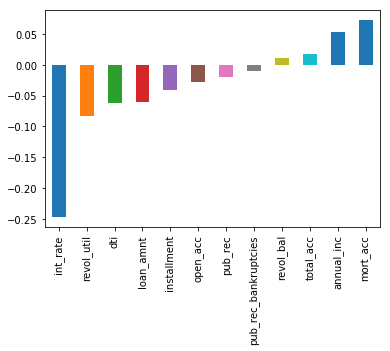

In [27]:
#Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.
data_lc.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data PreProcessing__ Dealing With Missing Data

* Remove or fill any missing data. 
* Remove unnecessary or repetitive features. 
* Convert categorical string features to dummy variables.

In [28]:
#Quick Data Overview
data_lc.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [29]:
#We explore the data for the missing data and decide if they are useful to determine whether to keep, fill-in, or discard them
# length of the dataframe

len(data_lc)

396030

In [30]:
#Check for missing data counts
data_lc.isnull().head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# we get the sum of the missing data in each column.
data_lc.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [32]:
#We check the proportion of the missing data in each column.

100 * data_lc.isnull().sum()/len(data_lc)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [33]:
#We'll examine the features and the info to determine how to treat the missing data.
#The columns with missing data
#_ emp_title 
#_ emp_length
#_ title
#_ revol_util
#_ mort_acc
#_ pub_rec_bankruptcies

feat_info('emp_title')
print('\n')
feat_info('emp_length')
print('\n')
feat_info('title')
print('\n')
feat_info('revol_util')
print('\n')
feat_info('mort_acc')
print('\n')
feat_info('pub_rec_bankruptcies')


The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


The loan title provided by the borrower


Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Number of mortgage accounts.


Number of public record bankruptcies


In [34]:
# exploring the 'emp_title' feature.
#find the how many unique 'emp_title' in the data.
data_lc['emp_title'].nunique()

173105

In [35]:
#how many counts of entries are in each emp_title.
data_lc['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
Sales                                       1638
Project Manager                             1505
Owner                                       1410
Driver                                      1339
Office Manager                              1218
manager                                     1145
Director                                    1089
General Manager                             1074
Engineer                                     995
teacher                                      962
driver                                       882
Vice President                               857
Operations Manager                           763
Administrative Assistant                     756
Accountant                                   748
President           

In [36]:
#we can decide to remove that emp_title column since it appears there are too many unique job titles
#to try to convert this to a dummy variable feature and almost half of the people have unique job titles, seems not very informative.

data_lc = data_lc.drop('emp_title', axis=1)

In [37]:
# exploring the 'emp_title' feature.
#check the unique 'emp_length' in the data.

sorted(data_lc['emp_length'].dropna().unique())


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [38]:
#re-ordering the 'emp_length'
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

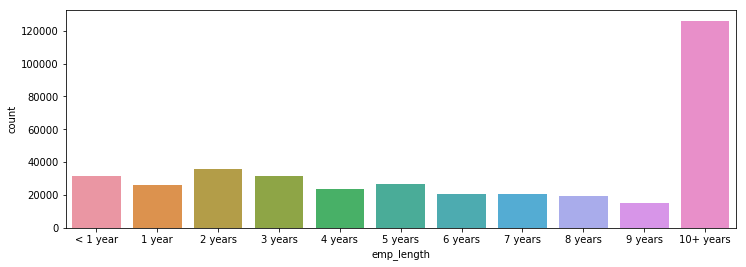

In [39]:
#Create a count plot of the emp_length feature column.

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data_lc,order=emp_length_order)

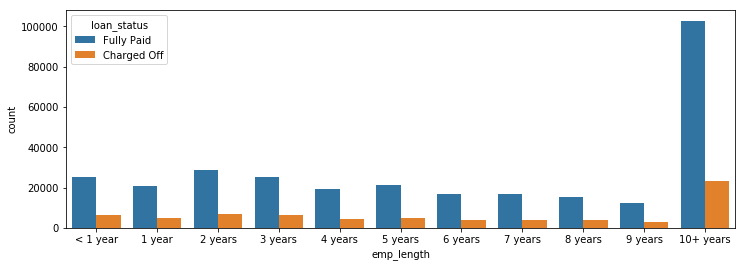

In [40]:
#Plot out the countplot with a hue to separate Fully Paid vs Charged Off
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data_lc,order=emp_length_order, hue = 'loan_status')

In [41]:
#This still doesn't really inform us if there is a strong relationship between employment length and being charged off, 
#We want the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 
#There are a multitude of ways to create this Series.

In [42]:
#We would calculate the ratio of charged off to fully paid
emp_chargedOff = data_lc[data_lc['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [43]:
emp_fullyPaid = data_lc[data_lc['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [44]:
emp_lenProp = emp_chargedOff/emp_fullyPaid
print(emp_lenProp)

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64


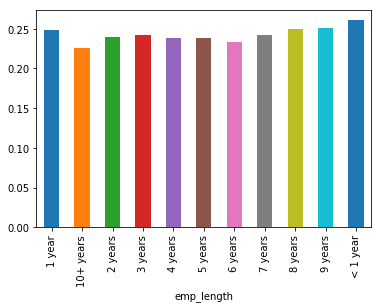

In [45]:
emp_lenProp.plot(kind='bar')

In [46]:
#Charged off rates are extremely similar across all employment lengths.
#let's drop the emp_length column.
data_lc = data_lc.drop('emp_length',axis=1)

In [47]:
# Exploring the 'title' column
# Review the title column vs the purpose column. Is this repeated information?
print(data_lc['purpose'].head(10))

print(feat_info('purpose'))

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object
A category provided by the borrower for the loan request. 
None


In [48]:
print(data_lc['title'].head(10))

print(feat_info('title'))

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object
The loan title provided by the borrower
None


In [49]:
#The title column is simply a string subcategory/description of the purpose column.
#make sense to drop this column

data_lc = data_lc.drop('title',axis=1)

In [50]:
#lastly, we need to explore the 'mort_acc' to determine how to handle the missing data

feat_info('mort_acc')

Number of mortgage accounts.


In [51]:
#Create a value_counts of the mort_acc column.

data_lc['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [52]:
#'mort_acc' has about the highest proportion of missing data, we should fill-in the missing
#We could compare this column with any strong correlated column
#we could find the mean of the correlated column and fill-in the missng values in 'mort_acc'

print("Correlation with the mort_acc column")
data_lc.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [53]:
#The total_acc has the strongest correlation with 'mort_acc'
#let's fill-in the missing the data with the average of 'total_acc'
#call the total_acc_avg that corresponds to 'mort_acc' column

print("Mean of mort_acc column per total_acc")
data_lc.groupby('total_acc').mean()['mort_acc'].head(20)

Mean of mort_acc column per total_acc


total_acc
2.0     0.000000
3.0     0.052023
4.0     0.066743
5.0     0.103289
6.0     0.151293
7.0     0.221695
8.0     0.308422
9.0     0.365499
10.0    0.429158
11.0    0.526570
12.0    0.618034
13.0    0.722124
14.0    0.803482
15.0    0.940142
16.0    1.007405
17.0    1.151269
18.0    1.235885
19.0    1.358013
20.0    1.409380
21.0    1.519932
Name: mort_acc, dtype: float64

In [54]:
#call the total_acc_avg that corresponds to 'mort_acc' column

total_acc_avg = data_lc.groupby('total_acc').mean()['mort_acc']

In [55]:
#average for person having 2.0 'total_acc'

total_acc_avg[2.0]

0.0

In [56]:
# function to fill-in the missing data in 'mort_acc' column.

def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [57]:
#applying the result to the 'mort_acc' column

data_lc['mort_acc'] = data_lc.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [58]:
#check for the missing data in each columns again.
#'mort_acc' column has been filled.

data_lc.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [59]:
#for 'revol_util' and 'pub_rec_bankruptcies' columns

print(feat_info('pub_rec_bankruptcies'))
#print\n
print(feat_info('revol_util'))

Number of public record bankruptcies
None
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
None


In [60]:
#The two columns appears informative and relevant to our prediction but the proportion of the missing values are negligible,
#So we could drop the missing values here.

data_lc = data_lc.dropna()
#data_lc['revol_util'].dropna()


In [61]:
#check to verify all missing values have been treated.
data_lc.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Treating the Categorical And Dummy Variables.

In [62]:
#Let's explore the columns with categorical and dummy variables
#Non-numeric variables in the data set

data_lc.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [63]:
#For the 'term' column
#we could convert the 'object' to 'int' by excluding the 'months'

print(feat_info('term'))

print(data_lc['term'].value_counts())

The number of payments on the loan. Values are in months and can be either 36 or 60.
None
 36 months    301247
 60 months     93972
Name: term, dtype: int64


In [64]:
#we could convert the 'term' feature into 36 or 60 integer numeric data type using .apply()
#we'll call the first two index to int.

data_lc['term'] = data_lc['term'].apply(lambda term: int(term[:3]))

In [65]:
#overview after conversion to integers.

data_lc['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [66]:
# For the 'grade', we could drop this since it's already part of the 'sub_grade' feature(duplicate information).

data_lc = data_lc.drop('grade',axis=1)

In [67]:
#We'll Convert the subgrade into dummy variables. 
#We'll add drop_first=True to your get_dummies call.

subgrade_dummies = pd.get_dummies(data_lc['sub_grade'],drop_first=True)

In [68]:
#Then concatenate these new columns to the original dataframe.
#We'll drop the original subgrade column and to add drop_first=True to your get_dummies call.

data_lc = pd.concat([data_lc.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [69]:
#'sub_grade' has been dropped and 'subgrade_dummies' have been added to the list of features.
data_lc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [70]:
#Quick check for the remaining 'object' variables

data_lc.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [71]:
#We'll convert the 'verification_status', 'application_type','initial_list_status','purpose' to dummies
dummies = pd.get_dummies(data_lc[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

#drop the initial variables to avoid duplicate information
data_lc = data_lc.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

#We'll concatenate the dummies to the data_lc
data_lc = pd.concat([data_lc, dummies], axis=1)

In [72]:
# For 'Home_Ownership' feature

data_lc['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [73]:
# We could make this category smaller by adding 'NONE' and 'ANY' into 'Other'
#The categories becomes only 4 categories
#We could use the .replace() function

data_lc['home_ownership'] = data_lc['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [74]:
##We'll convert the 'home_ownership' to dummies
dummies = pd.get_dummies(data_lc['home_ownership'],drop_first=True)

#drop the initial variables to avoid duplicate information
data_lc = data_lc.drop('home_ownership',axis=1)

#We'll concatenate the dummies to the data_lc
data_lc = pd.concat([data_lc, dummies],axis=1)

In [75]:
data_lc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [76]:
# For the 'address' column

data_lc['address'].value_counts

<bound method IndexOpsMixin.value_counts of 0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
5         1726 Cooper Passage Suite 129\nNorth Deniseber...
6         1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                                 USCGC Nunez\nFPO AE 30723
8                                  USCGC Tran\nFPO AP 22690
9                      3390 Luis Rue\nMauricestad, VA 00813
10                40245 Cody Drives\nBartlettfort, NM 00813
11         3126 Sean Dale Apt. 141\nSouth Matthew, MS 00813
12           4173 David Extension\nWest Beckyfort, MS 70466
13                 3343 Wells Mews\nShellychester, OR 29597
14        0472 Weber Manors Apt. 660\nLake Andrew, NH 29597
15         11629 Sean Hills Suite 614\nStevenfort, HI 30

In [77]:
#It's okay to work with the zip codes
#Let's feature engineer a zip code column from the address in the data set. 
#Create a column called 'zip_code' that extracts the zip code from the address column.

data_lc['zip_code'] = data_lc['address'].apply(lambda address:address[-5:])

In [78]:
data_lc['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [79]:
##We'll convert the 'zip_code' to dummies
dummies = pd.get_dummies(data_lc['zip_code'],drop_first=True)

#drop the initial variables to avoid duplicate information
data_lc = data_lc.drop(['zip_code','address'],axis=1)

#We'll concatenate the dummies to the data_lc
data_lc = pd.concat([data_lc, dummies],axis=1)

In [80]:
#For the 'issue_d', 
#We wouldn't know beforehand whether or not a loan would be issued when using our model,
#so in theory we wouldn't have an issue_date, let's drop this feature.
print(feat_info('issue_d'))
data_lc = data_lc.drop('issue_d',axis=1)

The month which the loan was funded
None


In [81]:
data_lc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',


In [82]:
# For the 'earliest_cr_line' feature
print(feat_info('earliest_cr_line'))
data_lc['earliest_cr_line'].head(10)

The month the borrower's earliest reported credit line was opened
None


0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
5    Jan-2005
6    Aug-2005
7    Sep-1994
8    Jun-1994
9    Dec-1997
Name: earliest_cr_line, dtype: object

In [83]:
# We could make use of the year from this feature.
#we set the year values to 'earliest_cr_year' variable
data_lc['earliest_cr_year'] = data_lc['earliest_cr_line'].apply(lambda date:int(date[-4:]))

#we would drop this 'earliest_cr_line' to avoid duplicate information.
data_lc = data_lc.drop('earliest_cr_line',axis=1)

In [84]:
#Overview, all 'object' datatypes are converted except the 'loan_status'
data_lc.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# Train_Test_Split

In [85]:
#Import train_test_split from sklearn.

from sklearn.model_selection import train_test_split

In [86]:
#drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. 
#We'll use the loan_repaid column since its already in 0s and 1s.

data_lc = data_lc.drop('loan_status',axis=1)

In [87]:
# Set X and y variables to the .values of the features and label.
#For X, we drop the 'loan_repaid' column from the data set and attache the values to X
#For y, we assign the 'loan_repaid' values to y.

X = data_lc.drop('loan_repaid',axis=1).values
y = data_lc['loan_repaid'].values

In [88]:
#To save training time, We could Use .sample() to grab a sample of the 390k+ entries. 
#This is highly recommended for lower RAM computers or if you are not using GPU.

# data_lc = data_lc.sample(frac=0.1,random_state=101)

In [89]:
#I would use the whole data set for training.

print(len(data_lc))

395219


In [90]:
#Now to Perform a train/test split with test_size=0.2 and a random_state of 101.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [91]:
#Let's Normalize the data
#Use a MinMaxScaler to normalize the feature data X_train and X_test. 
#Recall we don't want data leakage from the test set so we only fit on the X_train data.

from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
X_train = scaler.fit_transform(X_train)
X_train

array([[0.22307692, 0.        , 0.46552396, ..., 0.        , 0.        ,
        0.89855072],
       [0.48717949, 0.        , 0.32450331, ..., 0.        , 0.        ,
        0.85507246],
       [0.31666667, 1.        , 0.46552396, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.19358974, 0.        , 0.16945851, ..., 0.        , 0.        ,
        0.8115942 ],
       [0.28205128, 1.        , 0.4253993 , ..., 0.        , 0.        ,
        0.79710145],
       [0.87179487, 0.        , 0.57148422, ..., 0.        , 0.        ,
        0.76811594]])

In [94]:
X_test = scaler.transform(X_test)
X_test

array([[0.35384615, 0.        , 0.51305025, ..., 0.        , 0.        ,
        0.69565217],
       [0.76923077, 1.        , 0.47721075, ..., 0.        , 0.        ,
        0.75362319],
       [0.53846154, 1.        , 0.10011687, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.1025641 , 0.        , 0.2384106 , ..., 0.        , 0.        ,
        0.92753623],
       [0.48974359, 1.        , 0.74678613, ..., 0.        , 0.        ,
        0.79710145],
       [0.34358974, 1.        , 0.16945851, ..., 1.        , 0.        ,
        0.84057971]])

# Creating The Model And Fiting The model To Training data

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [96]:
X_train.shape

(316175, 78)

In [97]:
#We'll make the first layers have the same number of features(X_train.shape)
#The Dropout layer will help prevent overfeeding.
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
#The sigmoid activation function will produce output between 0 and 1.
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
#we use the loss function as 'binary_crossentropy' since we performing binary classification.
model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [98]:
#We'll Fit the model to the training data for at least 25 epochs. 
#We'll also add in the validation data for later plotting.
#We could also add in a batch_size of 256 to fit the model

model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 316175 samples, validate on 79044 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
316175/316175 [==============================] - 8s 25us/sample - loss: 0.3011 - val_loss: 0.2667
Epoch 2/25
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2660 - val_loss: 0.2633
Epoch 3/25
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2631 - val_loss: 0.2624
Epoch 4/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2617 - val_loss: 0.2619
Epoch 5/25
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2613 - val_loss: 0.2618
Epoch 6/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2606 - val_loss: 0.2616
Epoch 7/25
316175/316175 [==============================] - 7s 24us/sample - loss: 0.2600 - val_loss: 0.2615
Epoch 8/25
316175/31617

In [99]:
#Save our Model and Load Model again

from tensorflow.keras.models import load_model

In [100]:
model.save('My_Capstone_Project.h5')

# Evaluating Model Performance

In [101]:
#Let's Plot out the validation loss versus the training loss.

losses = pd.DataFrame(model.history.history)

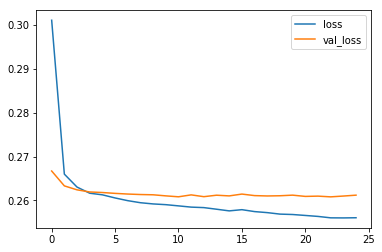

In [102]:
#Plot 'loss' against 'val_loss'
losses[['loss','val_loss']].plot()

In [103]:
#Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

from sklearn.metrics import classification_report,confusion_matrix

In [104]:
predictions = model.predict_classes(X_test)

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

   micro avg       0.89      0.89      0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [106]:
confusion_matrix(y_test,predictions)

array([[ 6859,  8799],
       [  107, 63279]], dtype=int64)